In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats

In [2]:
data = pd.read_pickle('df_tesco_marker_V1.pkl')

In [5]:
data.dtypes

Site Number                                       int64
Site Name                                        object
Transaction Date                         datetime64[ns]
Total Sales Value                               float64
Total Baskets                                     int64
Sales Baskets With Fuel                         float64
Baskets With Fuel                                 int64
Site ID                                         float64
PBL                                             float64
CRUSO_priceADO                                  float64
CRUSO_priceUL95                                 float64
volumeADO                                       float64
volumeUL95                                      float64
sales_valADO                                    float64
sales_valUL95                                   float64
totalSalesEsso                                  float64
pct_dev                                         float64
diff_shop_esso                                  

In [8]:
data.to_excel(r'dataPrep_2.xlsx',index=False)

In [10]:
data['TotalVol'] = data.volumeADO + data.volumeUL95

In [17]:
data['TotalVol'].quantile([0.25,0.5,0.75,0.95])

0.25   10,780.00
0.50   13,018.00
0.75   15,837.00
0.95   21,450.00
Name: TotalVol, dtype: float64

In [18]:
data['TotalVol_cuts'] = pd.cut(data['TotalVol'], [0,10780,13018,15837,21450,100000], include_lowest=True)

In [25]:
data.groupby('TotalVol_cuts')['Site Number'].nunique()

TotalVol_cuts
[0, 10780]         190
(10780, 13018]     181
(13018, 15837]     177
(15837, 21450]     140
(21450, 100000]     46
Name: Site Number, dtype: int64

In [23]:
data['TotalVol_cuts'].value_counts()

[0, 10780]         15504
(10780, 13018]     15501
(13018, 15837]     15490
(15837, 21450]     12396
(21450, 100000]     3099
Name: TotalVol_cuts, dtype: int64

<IPython.core.display.Javascript object>


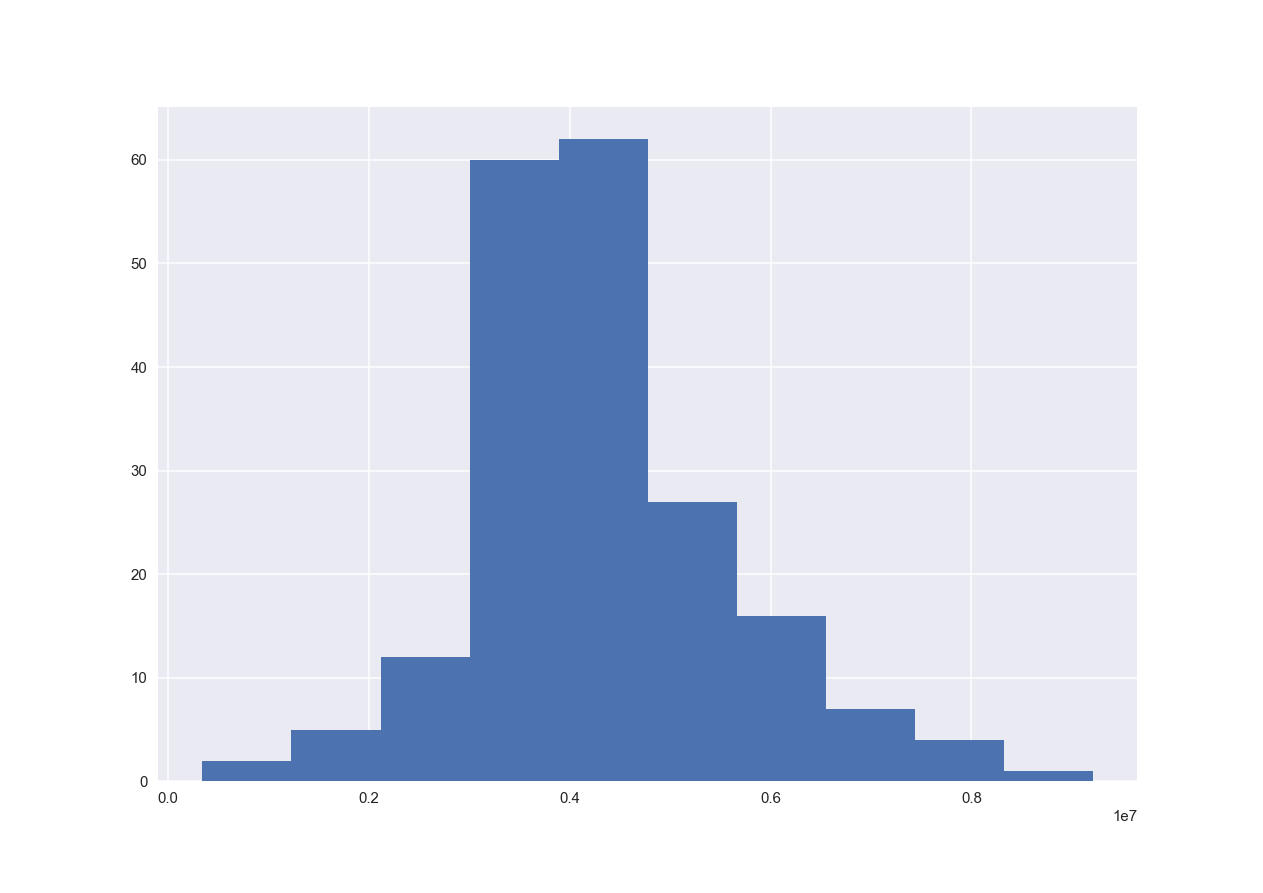

In [29]:
data.groupby('Site Name')['TotalVol'].sum().hist()

In [33]:
data.groupby('Site Name')['TotalVol'].sum().describe()

count         196.00
mean    4,304,306.72
std     1,315,156.50
min       342,344.00
25%     3,434,527.00
50%     4,169,020.00
75%     4,931,759.25
max     9,208,451.00
Name: TotalVol, dtype: float64

In [34]:
sales_df = data.groupby('Site Name')['TotalVol'].sum().reset_index()

In [36]:
sales_df.quantile([0.25,0.5,0.75,0.95])

TotalVol
0.25 3,434,527.00
0.50 4,169,020.00
0.75 4,931,759.25
0.95 6,708,014.25

In [35]:
sales_df.head()

Site Name     TotalVol
0  ABBEY ST ACCRNGTN EXP 4,319,075.00
1       ABINGTON EXPRESS 4,734,639.00
2  ACKLAM RD MIDSBRO EXP 8,115,442.00
3          ACTON EXPRESS 2,759,780.00
4     ADDISCOMBE EXPRESS 3,224,178.00

In [38]:
sales_df['TotalVol2'] = (sales_df['TotalVol']/1000000).round(2)

In [39]:
sales_df['TotalVol2'].describe()

count   196.00
mean      4.30
std       1.32
min       0.34
25%       3.43
50%       4.17
75%       4.93
max       9.21
Name: TotalVol2, dtype: float64

In [46]:
sales_df['TotalVol2'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05   2.44
0.25   3.43
0.50   4.17
0.75   4.93
0.95   6.71
Name: TotalVol2, dtype: float64

<IPython.core.display.Javascript object>


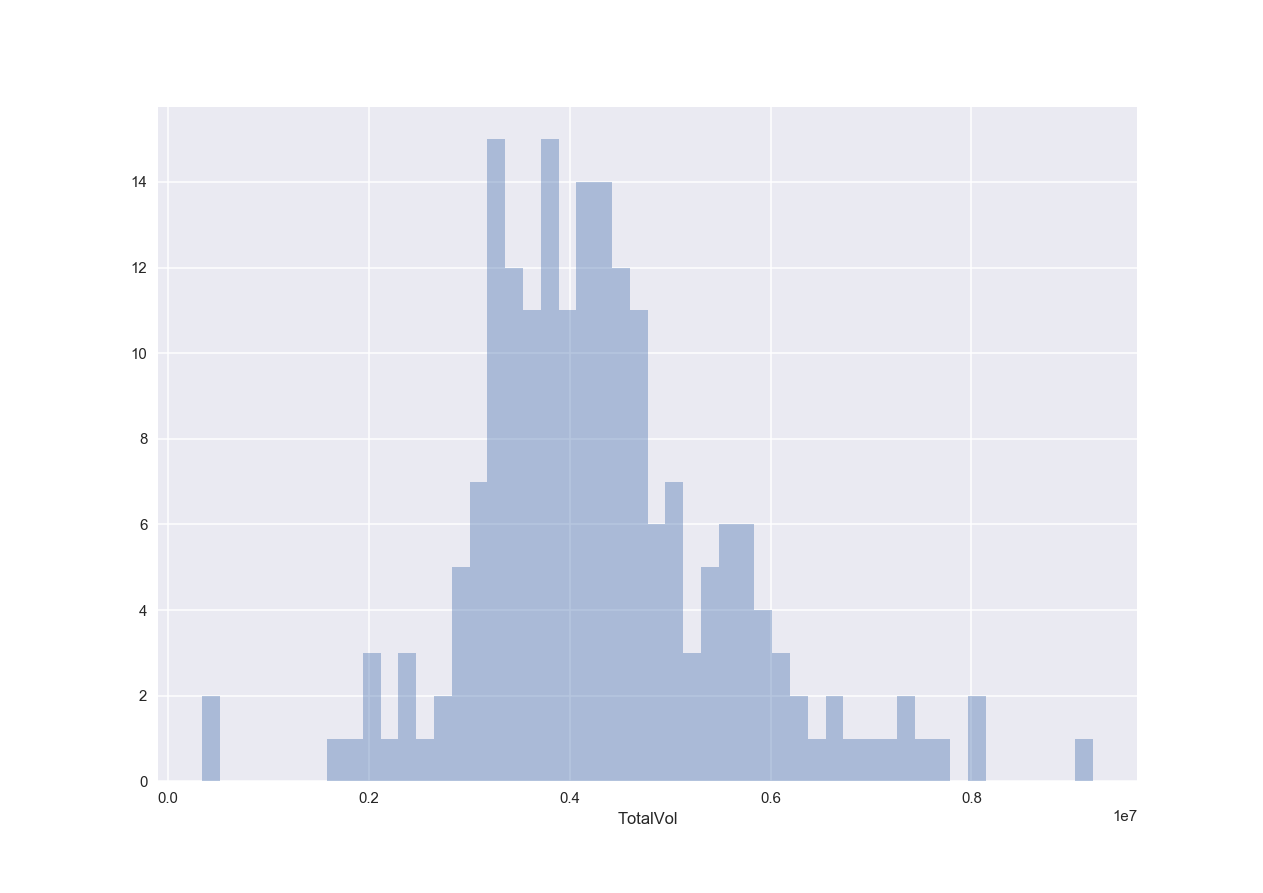

In [30]:
sns.distplot(data.groupby('Site Name')['TotalVol'].sum(),kde=False,bins=50)

<IPython.core.display.Javascript object>


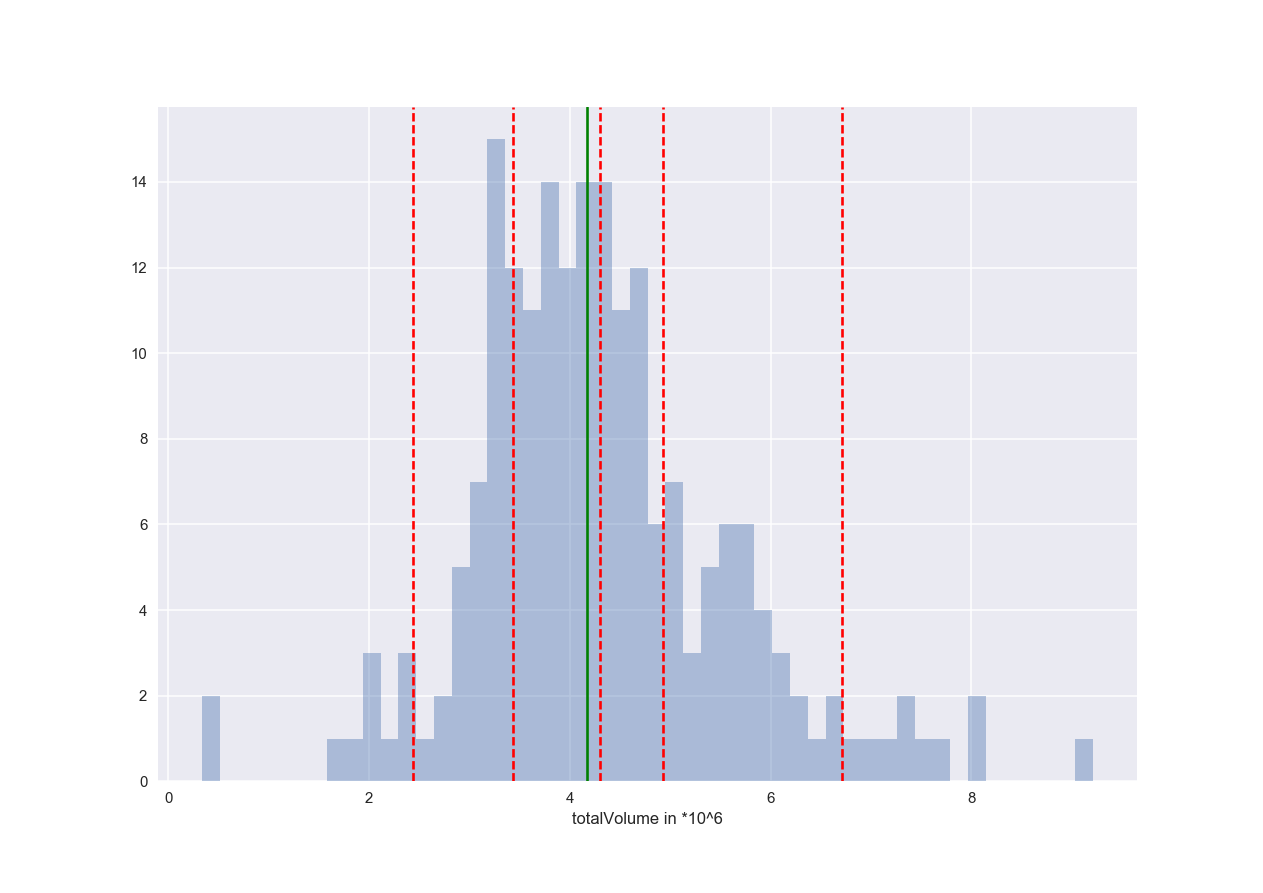

In [52]:
sns.distplot(sales_df['TotalVol2'],kde=False,bins=50)
mean_val = sales_df['TotalVol2'].mean()
median_val = sales_df['TotalVol2'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_val, color='r', linestyle='--')
plt.axvline(2.44, color='r', linestyle='--')
plt.axvline(3.43, color='r', linestyle='--')
plt.axvline(4.17, color='g', linestyle='-')
plt.axvline(4.93, color='r', linestyle='--')
plt.axvline(6.71, color='r', linestyle='--')
plt.xlabel('totalVolume in *10^6')
#plt.legend()
# plt.title('Ditribution of elasticity <abs Value of ShopSales vs ApprvdADO-Marker price Differential All Sites \
#           \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

In [50]:
sales_df['TotalVol2Cut'] = pd.cut(sales_df['TotalVol2'], [0,2.44,3.43,4.17,4.93,6.71,10], include_lowest=True)

In [51]:
sales_df['TotalVol2Cut'].value_counts()

(3.43, 4.17]    51
(4.17, 4.93]    47
(4.93, 6.71]    39
(2.44, 3.43]    39
(6.71, 10]      10
[0, 2.44]       10
Name: TotalVol2Cut, dtype: int64

In [13]:
reg_res = data.groupby('Site Name').apply( lambda x: stats.linregress(x['UL 95_ Approved Price'],\
                                                            x['UL 95_ Marker Price']))

In [39]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['UL 95_ Approved Price'],\
                                                            x['UL 95_ Marker Price'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regbySite = data.groupby('Site Name').apply(regRes).reset_index()

In [45]:
regbySite.to_excel('regbySiteResults.xlsx',index=False)

In [3]:
data['shopSales'] = data['Total Sales Value'] - data['Sales Baskets With Fuel']

In [46]:
data.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso', 'SiteCode', 'SiteName', 'Date',
       'UL 95_ Sales Transaction Volume', 'UL 95_ Approved Price',
       'UL 95_ Marker Price', 'UL 95_ Approved Price Vs Marker Price',
       'ADO_ Sales Transaction Volume', 'ADO_ Approved Price',
       'ADO_ Marker Price', 'ADO_ Approved Price Vs Marker Price',
       'avgUL95VolSite', 'avgADOVolSite', 'diffAdoVol', 'diffUL95Vol',
       'diffAdoVolpct', 'diffUL95Volpct', 'diffAdoPricePct',
       'diffUL95PricePct', 'avgShopSalesFromFuelSiteWise',
       'pctChgShopSalesFromFuel'],
      dtype='object')

In [50]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['shopSales'],\
                                                            x['ADO_ Approved Price Vs Marker Price'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regbySite_2 = data.groupby('Site Name').apply(regRes).reset_index()

In [48]:
data['ADO_ Approved Price Vs Marker Price'].describe()

count   61,990.00
mean         0.66
std          1.70
min         -9.00
25%         -0.36
50%          0.64
75%          1.64
max         14.20
Name: ADO_ Approved Price Vs Marker Price, dtype: float64

In [51]:
regbySite_2.to_excel('regbySiteResults_shopSalesVsApproved_ADO.xlsx',index=False)

In [53]:
regbySite_2.sample(50)

Site Name  slope  intercept  rvalu  pvalue  stderr
189         WITNEY EXPRESS  -0.00       2.14  -0.17    0.00    0.00
5          ARDSLEY EXPRESS   0.00       0.93   0.01    0.83    0.00
144    REEDLEY BURNLEY EXP  -0.00       1.70  -0.12    0.04    0.00
65   DOSTHILL TAMWORTH EXP   0.00       1.98   0.09    0.10    0.00
76       ERDINGTON EXPRESS  -0.00       2.64  -0.04    0.45    0.00
105        HORSHAM EXPRESS  -0.00       3.05  -0.18    0.00    0.00
191      WORCESTER EXPRESS   0.00      -0.22   0.01    0.88    0.00
181     WHITCHURCH EXPRESS  -0.00       0.41  -0.01    0.87    0.00
72       EDINBURGH EXPRESS  -0.00       3.47  -0.17    0.00    0.00
35          CAMDEN EXPRESS  -0.00       2.02  -0.00    0.98    0.00
139         PENDLEBURY EXP  -0.00       2.21  -0.14    0.01    0.00
175            WARMLEY EXP   0.00       0.55   0.08    0.14    0.00
43      CHAPELTOWN EXPRESS  -0.00      -0.37  -0.09    0.10    0.00
95          HARROW EXPRESS  -0.00       0.59  -0.14    0.03    0.00
23   BRAMHALL CHESHIRE EXP  -0.00      -0.65  -0.06    0.32    0.00
30            BURY EXPRESS   0.00      -0.72   0.02    0.77    0.00
62      DEWSBURY YORKS EXP  -0.00       1.92  -0.01    0.89    0.00
109         IVER HEATH EXP   0.00      -2.60   0.21    0.00    0.00
89      GLYN NEATH EXPRESS  -0.00       3.68  -0.22    0.00    0.00
161      SOUTHCOTE EXPRESS  -0.00       0.82  -0.03    0.54    0.00
179           WESTBURN EXP   0.00      -1.74   0.00    0.97    0.00
98   HEATHHALL DUMFRIE EXP  -0.00       2.24  -0.19    0.00    0.00
31        BUSHBURY EXPRESS   0.00      -0.12   0.05    0.33    0.00
126  NEW PRK THNTN HTH EXP   0.00      -1.11   0.13    0.02    0.00
86   FRINDSBURY STROOD EXP  -0.00       1.65  -0.06    0.28    0.00
64     DOGS THORPE EXPRESS   0.00      -1.27   0.03    0.58    0.00
85      FOREST ROW EXPRESS  -0.00       1.20  -0.05    0.45    0.00
118   LEIGH ON SEA EXPRESS  -0.00       0.85  -0.09    0.11    0.00
136   ORFORD GREEN EXPRESS   0.00      -1.57   0.14    0.01    0.00
114       LEAVENTHORPE EXP   0.00       1.50   0.11    0.04    0.00
128  NEWPORT CHPSTW RD EXP  -0.00       0.99  -0.04    0.48    0.00
168       TOLWORTH EXPRESS  -0.00       1.31  -0.04    0.45    0.00
121       LOCHGILPHEAD EXP   0.00       0.29   0.10    0.08    0.00
21          BOURNE EXPRESS  -0.00       1.39  -0.07    0.22    0.00
116  LEEDS RD ROTHWELL EXP  -0.00       1.47  -0.06    0.32    0.00
63      DIBDEN PURLIEU EXP  -0.00       0.76  -0.10    0.07    0.00
154       SHEFFORD EXPRESS   0.00       0.57   0.14    0.01    0.00
127  NEWCASTLE WEST RD EXP  -0.00       1.48  -0.25    0.00    0.00
44           CHEAM EXPRESS   0.00       0.52   0.02    0.73    0.00
14        BEARSTED EXPRESS   0.00      -0.28   0.04    0.45    0.00
71   ECCLES LIVERPL RD EXP   0.00      -1.45   0.04    0.50    0.00
6        ARDWICK GREEN EXP   0.00       0.59   0.10    0.07    0.00
166    STORRINGTON EXPRESS  -0.00       2.00  -0.11    0.04    0.00
180  WEYMOUTH LANEH RD EXP  -0.00       0.46  -0.01    0.82    0.00
88          FULHAM EXPRESS   0.00       0.41   0.06    0.25    0.00
79         EYNSHAM EXPRESS   0.00       0.71   0.01    0.80    0.00
186      WIMBLEDON EXPRESS  -0.00       2.40  -0.26    0.00    0.00
58         CROYDON EXPRESS  -0.00       0.94  -0.02    0.77    0.00
155  SILKSWRTH RD SUND EXP  -0.00       0.50  -0.07    0.22    0.00
17      BILLY MILL EXPRESS  -0.00       1.52  -0.15    0.01    0.00

In [55]:
regbySite_sig = regbySite_2.query('pvalue <= 0.05')

In [57]:
regbySite_sig.shape

(61, 6)

In [58]:
regbySite_2.shape

(196, 6)

In [59]:
regbySite_sig.head(50)

Site Name  slope  intercept  rvalu  pvalue  stderr
0    ABBEY ST ACCRNGTN EXP   0.00       0.09   0.12    0.03    0.00
10         BARKING EXPRESS  -0.00       2.16  -0.21    0.00    0.00
15   BESSACARR DONCAST EXP  -0.00       3.09  -0.17    0.00    0.00
16   BEWDLEY HILL KIDD EXP  -0.00       3.00  -0.12    0.03    0.00
17      BILLY MILL EXPRESS  -0.00       1.52  -0.15    0.01    0.00
18        BITTERNE EXPRESS   0.00      -0.30   0.18    0.00    0.00
19   BOLTON BRADFRD ST EXP  -0.00       2.26  -0.15    0.01    0.00
24         BRECHIN EXPRESS  -0.00       4.32  -0.15    0.01    0.00
33          BUXTON EXPRESS  -0.00       2.49  -0.11    0.05    0.00
34   BYPASS BILLINGHAM EXP  -0.00       0.82  -0.12    0.03    0.00
37    CANONS CRN EDGWR EXP   0.00      -0.27   0.11    0.04    0.00
39       CAVERSHAM EXPRESS  -0.00       2.46  -0.18    0.00    0.00
41   CHADWELL ST MARY EXPR   0.00      -0.69   0.13    0.01    0.00
49      CHURCHTOWN EXPRESS  -0.00       2.31  -0.20    0.00    0.00
50        CLIFTON LANE EXP   0.00      -1.21   0.14    0.05    0.00
51         CLIFTON LEE EXP  -0.00       3.86  -0.11    0.04    0.00
52   COLLIERS WOOD EXPRESS   0.00      -1.15   0.12    0.04    0.00
59    DALHOUSIE DUNDEE EXP   0.00       0.99   0.14    0.02    0.00
72       EDINBURGH EXPRESS  -0.00       3.47  -0.17    0.00    0.00
73    ELTHAM HI ST LON EXP   0.00       0.19   0.20    0.00    0.00
75         ENFIELD EXPRESS   0.00      -3.84   0.23    0.00    0.00
83     FOREST GATE EXPRESS  -0.00       4.42  -0.41    0.03    0.00
84     FOREST HILL EXPRESS  -0.00       3.07  -0.23    0.00    0.00
87   FROGWELL CHIPPNHM EXP   0.00      -5.40   0.18    0.00    0.00
89      GLYN NEATH EXPRESS  -0.00       3.68  -0.22    0.00    0.00
90        GOWERTON EXPRESS   0.00      -1.09   0.21    0.00    0.00
92      GROVE PARK EXPRESS   0.00      -5.49   0.30    0.00    0.00
93       HARPENDEN EXPRESS  -0.00       4.97  -0.24    0.00    0.00
94       HARROGATE EXPRESS  -0.00       0.84  -0.18    0.00    0.00
95          HARROW EXPRESS  -0.00       0.59  -0.14    0.03    0.00
98   HEATHHALL DUMFRIE EXP  -0.00       2.24  -0.19    0.00    0.00
99       HEAVITREE EXPRESS  -0.00       1.24  -0.16    0.00    0.00
105        HORSHAM EXPRESS  -0.00       3.05  -0.18    0.00    0.00
108         ILKLEY EXPRESS  -0.00       2.23  -0.20    0.00    0.00
109         IVER HEATH EXP   0.00      -2.60   0.21    0.00    0.00
110   KINGSWINFORD EXPRESS  -0.00      -0.03  -0.12    0.04    0.00
113      LARKFIELD EXPRESS   0.00      -0.01   0.12    0.02    0.00
114       LEAVENTHORPE EXP   0.00       1.50   0.11    0.04    0.00
117  LEICESTER FOSSE EXPRS   0.00      -2.29   0.18    0.00    0.00
124  N/CASTLE B/TON RD EXP  -0.00       1.62  -0.11    0.04    0.00
126  NEW PRK THNTN HTH EXP   0.00      -1.11   0.13    0.02    0.00
127  NEWCASTLE WEST RD EXP  -0.00       1.48  -0.25    0.00    0.00
131  NOTTM RD M MOWBRY EXP  -0.00       0.96  -0.18    0.00    0.00
132        OAKWOOD EXPRESS  -0.00       1.81  -0.12    0.05    0.00
133    OLDSWINFORD EXPRESS  -0.00       5.79  -0.13    0.02    0.00
136   ORFORD GREEN EXPRESS   0.00      -1.57   0.14    0.01    0.00
139         PENDLEBURY EXP  -0.00       2.21  -0.14    0.01    0.00
144    REEDLEY BURNLEY EXP  -0.00       1.70  -0.12    0.04    0.00
146  RIDGECLOSE KETTER EXP   0.00      -5.67   0.12    0.03    0.00
154       SHEFFORD EXPRESS   0.00       0.57   0.14    0.01    0.00

In [61]:
data.loc[data['Site Name'] == 'BARKING EXPRESS',:].shape

(305, 40)

In [62]:
data.groupby('Site Name').size()

Site Name
ABBEY ST ACCRNGTN EXP    336
ABINGTON EXPRESS         320
ACKLAM RD MIDSBRO EXP    333
ACTON EXPRESS            319
ADDISCOMBE EXPRESS       330
ARDSLEY EXPRESS          315
ARDWICK GREEN EXP        344
ASHTON IN MAKRFLD EXP    296
AULD CROSS EXP           310
BALHAM EXPRESS           322
BARKING EXPRESS          305
BARNES EXPRESS           332
BASFORD EXPRESS          333
BATTLE EXPRESS           144
BEARSTED EXPRESS         328
BESSACARR DONCAST EXP    325
BEWDLEY HILL KIDD EXP    330
BILLY MILL EXPRESS       331
BITTERNE EXPRESS         316
BOLTON BRADFRD ST EXP    313
BOOTHFERRY HESSLE EXP    354
BOURNE EXPRESS           350
BOURNVILLE BHAM EXP      316
BRAMHALL CHESHIRE EXP    294
BRECHIN EXPRESS          316
BRENTWOOD EXPRESS        329
BRISTL SOUNDWEL EXP      328
BRISTOL FILTON EXP       328
BROMLEY EXPRESS          331
BULLSMRE LN WAL X EXP    323
                        ... 
STORRINGTON EXPRESS      341
TARBOCK WOODLANDS EXP    338
TOLWORTH EXPRESS         319
TONB

In [63]:
data['shopSales'].describe()

count   61,990.00
mean     8,795.84
std      2,628.41
min          0.00
25%      7,049.37
50%      8,457.18
75%     10,250.06
max     35,240.96
Name: shopSales, dtype: float64

In [64]:
data.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso', 'SiteCode', 'SiteName', 'Date',
       'UL 95_ Sales Transaction Volume', 'UL 95_ Approved Price',
       'UL 95_ Marker Price', 'UL 95_ Approved Price Vs Marker Price',
       'ADO_ Sales Transaction Volume', 'ADO_ Approved Price',
       'ADO_ Marker Price', 'ADO_ Approved Price Vs Marker Price',
       'avgUL95VolSite', 'avgADOVolSite', 'diffAdoVol', 'diffUL95Vol',
       'diffAdoVolpct', 'diffUL95Volpct', 'diffAdoPricePct',
       'diffUL95PricePct', 'avgShopSalesFromFuelSiteWise',
       'pctChgShopSalesFromFuel', 'shopSales'],
      dtype='object')

In [4]:
data['avgShopSalesSiteWise'] = data.groupby('PBL')['shopSales'].transform('mean')

In [5]:
data['ShopSalesPctChgFromAvg'] = (data.shopSales/data.avgShopSalesSiteWise -1)*100

In [6]:
data['AdoApprPriceChgPct'] =  (data['ADO_ Approved Price']/data['ADO_ Marker Price']-1)*100
data['UL95AppPriceChgPct'] = (data['UL 95_ Approved Price'] / data['UL 95_ Marker Price']-1)*100

In [7]:
data['avgFuelSalesEssoSiteWise'] = data.groupby('PBL')['totalSalesEsso'].transform('mean')

In [11]:
data['fuelSalesPctChgFromAvgEsso'] = (data['totalSalesEsso'] / data['avgFuelSalesEssoSiteWise']-1)*100

In [12]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['ADO_ Approved Price Vs Marker Price'],\
                                                          x['shopSales'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regShopSalesVsAppPriceADO = data.groupby('Site Name').apply(regRes).reset_index()

In [13]:
regShopSalesVsAppPriceADO.sample(10)

Site Name   slope  intercept  rvalu  pvalue  stderr
182     WHITEGATES EXPRESS  -19.82  11,576.86  -0.01    0.80   76.61
33          BUXTON EXPRESS -141.19  13,558.42  -0.11    0.05   70.36
85      FOREST ROW EXPRESS  -58.76   9,815.91  -0.05    0.45   77.69
100       HENLEAZE EXPRESS  -57.99   6,491.84  -0.08    0.13   38.61
176    WEDNESFIELD EXPRESS  143.39   7,811.87   0.15    0.01   52.04
156         SLOUGH EXPRESS  128.63  12,238.00   0.09    0.68  311.46
127  NEWCASTLE WEST RD EXP -214.47   7,937.68  -0.25    0.00   46.20
24         BRECHIN EXPRESS  -60.65   5,470.02  -0.15    0.01   23.19
29   BULLSMRE LN WAL X EXP   18.99   9,463.76   0.02    0.72   51.99
65   DOSTHILL TAMWORTH EXP   81.52   8,646.76   0.09    0.10   48.88

In [14]:
regShopSalesVsAppPriceADO_sig = regShopSalesVsAppPriceADO.query('pvalue <= 0.05')

In [15]:
regShopSalesVsAppPriceADO_sig.sample(50)

Site Name   slope  intercept  rvalu  pvalue  stderr
84     FOREST HILL EXPRESS -123.86   5,416.32  -0.23    0.00   29.62
52   COLLIERS WOOD EXPRESS  111.03  10,864.18   0.12    0.04   52.79
114       LEAVENTHORPE EXP   57.22   5,861.23   0.11    0.04   27.94
50        CLIFTON LANE EXP  105.39   8,059.05   0.14    0.05   52.96
105        HORSHAM EXPRESS -347.61  14,534.98  -0.18    0.00  110.09
37    CANONS CRN EDGWR EXP   94.02  11,116.14   0.11    0.04   45.71
154       SHEFFORD EXPRESS  214.79  11,397.24   0.14    0.01   86.32
89      GLYN NEATH EXPRESS -291.27   8,191.83  -0.22    0.00   66.23
19   BOLTON BRADFRD ST EXP -127.57   8,347.67  -0.15    0.01   46.41
131  NOTTM RD M MOWBRY EXP -127.48   7,611.92  -0.18    0.00   41.01
87   FROGWELL CHIPPNHM EXP   77.74   9,201.25   0.18    0.00   25.28
10         BARKING EXPRESS -246.82   8,875.62  -0.21    0.00   66.17
39       CAVERSHAM EXPRESS -372.91  10,302.81  -0.18    0.00  108.24
33          BUXTON EXPRESS -141.19  13,558.42  -0.11    0.05   70.36
109         IVER HEATH EXP  105.76   5,542.03   0.21    0.00   27.27
34   BYPASS BILLINGHAM EXP  -84.68   7,772.22  -0.12    0.03   38.93
51         CLIFTON LEE EXP  -50.74   7,119.55  -0.11    0.04   24.89
24         BRECHIN EXPRESS  -60.65   5,470.02  -0.15    0.01   23.19
110   KINGSWINFORD EXPRESS  -41.89   5,365.17  -0.12    0.04   19.93
72       EDINBURGH EXPRESS -165.49   9,937.55  -0.17    0.00   54.76
99       HEAVITREE EXPRESS -181.93   9,860.97  -0.16    0.00   62.90
108         ILKLEY EXPRESS -141.40   5,656.91  -0.20    0.00   38.84
73    ELTHAM HI ST LON EXP  151.70   6,665.22   0.20    0.00   41.46
126  NEW PRK THNTN HTH EXP  104.62   9,169.08   0.13    0.02   43.66
83     FOREST GATE EXPRESS -390.97   8,748.61  -0.41    0.03  171.83
18        BITTERNE EXPRESS  186.36   7,654.74   0.18    0.00   56.54
113      LARKFIELD EXPRESS  141.82   9,074.34   0.12    0.02   62.09
94       HARROGATE EXPRESS -132.55   8,404.35  -0.18    0.00   41.89
176    WEDNESFIELD EXPRESS  143.39   7,811.87   0.15    0.01   52.04
165      STOCKWELL EXPRESS -151.68   9,240.99  -0.18    0.00   46.04
41   CHADWELL ST MARY EXPR  118.44  13,494.57   0.13    0.01   48.22
117  LEICESTER FOSSE EXPRS   70.40   7,433.97   0.18    0.00   21.37
144    REEDLEY BURNLEY EXP  -61.48   8,104.49  -0.12    0.04   29.13
186      WIMBLEDON EXPRESS -334.72  10,571.47  -0.26    0.00   69.23
92      GROVE PARK EXPRESS  167.83   8,425.66   0.30    0.00   29.86
139         PENDLEBURY EXP  -97.02   7,054.05  -0.14    0.01   38.17
189         WITNEY EXPRESS -240.68  11,933.51  -0.17    0.00   74.70
90        GOWERTON EXPRESS  196.73   8,643.42   0.21    0.00   49.60
75         ENFIELD EXPRESS  120.69  10,433.51   0.23    0.00   29.36
95          HARROW EXPRESS -113.17   7,387.25  -0.14    0.03   50.29
124  N/CASTLE B/TON RD EXP  -55.06   7,070.61  -0.11    0.04   26.08
190    WOODINGDEAN EXPRESS  -86.21   7,692.30  -0.15    0.01   32.40
49      CHURCHTOWN EXPRESS -108.17   6,717.23  -0.20    0.00   30.71
136   ORFORD GREEN EXPRESS   70.26   6,496.78   0.14    0.01   27.99
133    OLDSWINFORD EXPRESS -102.78  12,213.29  -0.13    0.02   42.74
59    DALHOUSIE DUNDEE EXP   60.63   3,263.80   0.14    0.02   26.82
98   HEATHHALL DUMFRIE EXP -288.10   8,613.87  -0.19    0.00   84.98
185    WILLENHALL BHAM EXP  226.08   6,979.62   0.19    0.00   66.75
16   BEWDLEY HILL KIDD EXP -105.33   8,583.27  -0.12    0.03   49.40
171      TULSEHILL EXPRESS  -87.91   8,086.10  -0.11    0.04   42.98

In [16]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['AdoApprPriceChgPct'],\
                                                          x['ShopSalesPctChgFromAvg'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regShopSalesVsAppPriceADO_pct = data.groupby('Site Name').apply(regRes).reset_index()

regShopSalesVsAppPriceADO_pct_sig = regShopSalesVsAppPriceADO_pct.query('pvalue <= 0.05')

In [18]:
regShopSalesVsAppPriceADO_pct_sig.shape

(61, 6)

In [19]:
regShopSalesVsAppPriceADO_sig.shape

(61, 6)

In [20]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['ADO_ Approved Price Vs Marker Price'],\
                                                          x['totalSalesEsso'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regEssoSalesVsAppPriceADO = data.groupby('Site Name').apply(regRes).reset_index()

In [21]:
regEssoSalesVsAppPriceADO_sig = regEssoSalesVsAppPriceADO.query('pvalue <= 0.05')

In [22]:
regEssoSalesVsAppPriceADO_sig.shape

(116, 6)

In [23]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['AdoApprPriceChgPct'],\
                                                          x['fuelSalesPctChgFromAvgEsso'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regEssoSalesVsAppPriceADO_pct = data.groupby('Site Name').apply(regRes).reset_index()

In [24]:
regEssoSalesVsAppPriceADO_pct_sig = regEssoSalesVsAppPriceADO_pct.query('pvalue <= 0.05')

In [25]:
regEssoSalesVsAppPriceADO_pct_sig.shape

(118, 6)

In [26]:
#data.to_excel('viz_2.xlsx',index=False)

KeyboardInterrupt: 

In [95]:
# regShopSalesVsAppPriceADO_sig.to_excel('regShopSalesVsAppPriceADO_sig.xlsx',index=False)
# regShopSalesVsAppPriceADO_pct_sig.to_excel('regShopSalesVsAppPriceADO_pct_sig.xlsx',index=False)
# regEssoSalesVsAppPriceADO_sig.to_excel('regEssoSalesVsAppPriceADO_sig.xlsx',index=False)
# regEssoSalesVsAppPriceADO_pct_sig.to_excel('regEssoSalesVsAppPriceADO_pct_sig.xlsx',index=False)

In [97]:
regShopSalesVsAppPriceADO_sig.shape

(61, 6)

In [98]:
regShopSalesVsAppPriceADO_sig

Site Name   slope  intercept  rvalu  pvalue  stderr
0    ABBEY ST ACCRNGTN EXP  136.83   8,845.82   0.12    0.03   60.93
10         BARKING EXPRESS -246.82   8,875.62  -0.21    0.00   66.17
15   BESSACARR DONCAST EXP  -82.45   8,802.65  -0.17    0.00   26.25
16   BEWDLEY HILL KIDD EXP -105.33   8,583.27  -0.12    0.03   49.40
17      BILLY MILL EXPRESS  -99.55   4,098.19  -0.15    0.01   35.31
18        BITTERNE EXPRESS  186.36   7,654.74   0.18    0.00   56.54
19   BOLTON BRADFRD ST EXP -127.57   8,347.67  -0.15    0.01   46.41
24         BRECHIN EXPRESS  -60.65   5,470.02  -0.15    0.01   23.19
33          BUXTON EXPRESS -141.19  13,558.42  -0.11    0.05   70.36
34   BYPASS BILLINGHAM EXP  -84.68   7,772.22  -0.12    0.03   38.93
37    CANONS CRN EDGWR EXP   94.02  11,116.14   0.11    0.04   45.71
39       CAVERSHAM EXPRESS -372.91  10,302.81  -0.18    0.00  108.24
41   CHADWELL ST MARY EXPR  118.44  13,494.57   0.13    0.01   48.22
49      CHURCHTOWN EXPRESS -108.17   6,717.23  -0.20    0.00   30.71
50        CLIFTON LANE EXP  105.39   8,059.05   0.14    0.05   52.96
51         CLIFTON LEE EXP  -50.74   7,119.55  -0.11    0.04   24.89
52   COLLIERS WOOD EXPRESS  111.03  10,864.18   0.12    0.04   52.79
59    DALHOUSIE DUNDEE EXP   60.63   3,263.80   0.14    0.02   26.82
72       EDINBURGH EXPRESS -165.49   9,937.55  -0.17    0.00   54.76
73    ELTHAM HI ST LON EXP  151.70   6,665.22   0.20    0.00   41.46
75         ENFIELD EXPRESS  120.69  10,433.51   0.23    0.00   29.36
83     FOREST GATE EXPRESS -390.97   8,748.61  -0.41    0.03  171.83
84     FOREST HILL EXPRESS -123.86   5,416.32  -0.23    0.00   29.62
87   FROGWELL CHIPPNHM EXP   77.74   9,201.25   0.18    0.00   25.28
89      GLYN NEATH EXPRESS -291.27   8,191.83  -0.22    0.00   66.23
90        GOWERTON EXPRESS  196.73   8,643.42   0.21    0.00   49.60
92      GROVE PARK EXPRESS  167.83   8,425.66   0.30    0.00   29.86
93       HARPENDEN EXPRESS -152.10   8,905.17  -0.24    0.00   34.54
94       HARROGATE EXPRESS -132.55   8,404.35  -0.18    0.00   41.89
95          HARROW EXPRESS -113.17   7,387.25  -0.14    0.03   50.29
..                     ...     ...        ...    ...     ...     ...
99       HEAVITREE EXPRESS -181.93   9,860.97  -0.16    0.00   62.90
105        HORSHAM EXPRESS -347.61  14,534.98  -0.18    0.00  110.09
108         ILKLEY EXPRESS -141.40   5,656.91  -0.20    0.00   38.84
109         IVER HEATH EXP  105.76   5,542.03   0.21    0.00   27.27
110   KINGSWINFORD EXPRESS  -41.89   5,365.17  -0.12    0.04   19.93
113      LARKFIELD EXPRESS  141.82   9,074.34   0.12    0.02   62.09
114       LEAVENTHORPE EXP   57.22   5,861.23   0.11    0.04   27.94
117  LEICESTER FOSSE EXPRS   70.40   7,433.97   0.18    0.00   21.37
124  N/CASTLE B/TON RD EXP  -55.06   7,070.61  -0.11    0.04   26.08
126  NEW PRK THNTN HTH EXP  104.62   9,169.08   0.13    0.02   43.66
127  NEWCASTLE WEST RD EXP -214.47   7,937.68  -0.25    0.00   46.20
131  NOTTM RD M MOWBRY EXP -127.48   7,611.92  -0.18    0.00   41.01
132        OAKWOOD EXPRESS -114.92  10,610.82  -0.12    0.05   57.07
133    OLDSWINFORD EXPRESS -102.78  12,213.29  -0.13    0.02   42.74
136   ORFORD GREEN EXPRESS   70.26   6,496.78   0.14    0.01   27.99
139         PENDLEBURY EXP  -97.02   7,054.05  -0.14    0.01   38.17
144    REEDLEY BURNLEY EXP  -61.48   8,104.49  -0.12    0.04   29.13
146  RIDGECLOSE KETTER EXP   23.18   6,925.40   0.12    0.03   10.74
154       SHEFFORD EXPRESS  214.79  11,397.24   0.14    0.01   86.32
165      STOCKWELL EXPRESS -151.68   9,240.99  -0.18    0.00   46.04
166    STORRINGTON EXPRESS  -95.90  10,398.55  -0.11    0.04   46.13
167  TARBOCK WOODLANDS EXP  358.87   9,644.58   0.47    0.00   36.45
171      TULSEHILL EXPRESS  -87.91   8,086.10  -0.11    0.04   42.98
172        TUPSLEY EXPRESS -146.25   7,953.43  -0.16    0.00   50.21
176    WEDNESFIELD EXPRESS  143.39   7,811.87   0.15    0.01   52.04
177   WEST BYFLEET EXPRESS  196.45   6,375.91   0.23    0.00   57.24
185    WILLENHA

In [99]:
regEssoSalesVsAppPriceADO_sig

Site Name     slope  intercept  rvalu  pvalue  stderr
0    ABBEY ST ACCRNGTN EXP   -351.71  16,677.38  -0.17    0.00  110.53
1         ABINGTON EXPRESS   -342.55  19,377.72  -0.13    0.03  152.30
2    ACKLAM RD MIDSBRO EXP   -883.78  31,793.06  -0.35    0.00  128.36
4       ADDISCOMBE EXPRESS   -312.53  13,137.54  -0.16    0.00  106.55
5          ARDSLEY EXPRESS   -548.71  19,680.14  -0.24    0.00  123.33
8           AULD CROSS EXP   -308.07  13,342.12  -0.19    0.00   90.95
10         BARKING EXPRESS   -533.89  19,012.67  -0.21    0.00  144.49
12         BASFORD EXPRESS   -213.30  16,513.13  -0.17    0.00   68.21
14        BEARSTED EXPRESS   -590.46  14,911.64  -0.42    0.00   71.61
15   BESSACARR DONCAST EXP    202.51  22,947.41   0.21    0.00   51.40
16   BEWDLEY HILL KIDD EXP   -532.24  16,637.34  -0.37    0.00   73.44
17      BILLY MILL EXPRESS   -552.18  12,877.46  -0.37    0.00   77.63
18        BITTERNE EXPRESS    504.74  19,322.15   0.18    0.00  157.89
20   BOOTHFERRY HESSLE EXP   -286.44  13,083.12  -0.19    0.00   77.75
21          BOURNE EXPRESS   -477.44  22,595.06  -0.18    0.00  137.71
22     BOURNVILLE BHAM EXP   -237.18  11,500.19  -0.19    0.00   70.52
23   BRAMHALL CHESHIRE EXP   -653.18  14,039.78  -0.24    0.00  152.06
24         BRECHIN EXPRESS    385.66  21,462.65   0.25    0.00   83.36
27      BRISTOL FILTON EXP    323.78  19,651.62   0.15    0.01  114.89
28         BROMLEY EXPRESS   -249.40  17,099.05  -0.13    0.02  104.73
30            BURY EXPRESS   -149.73  16,457.87  -0.16    0.00   52.55
31        BUSHBURY EXPRESS   -231.01  16,464.02  -0.17    0.00   73.84
32    BUSHEY HEATH EXPRESS    374.97  18,890.36   0.15    0.01  135.85
37    CANONS CRN EDGWR EXP   -485.35  28,014.79  -0.25    0.00  104.64
38       CARDONALD EXPRESS   -223.30  10,566.83  -0.25    0.00   47.14
40      CHADDESDEN EXPRESS   -360.31  20,621.13  -0.22    0.00   85.88
43      CHAPELTOWN EXPRESS   -698.38  21,516.24  -0.26    0.00  147.54
44           CHEAM EXPRESS   -248.63  10,635.49  -0.26    0.00   50.77
45         CHELSEA EXPRESS   -324.04  12,592.79  -0.22    0.00   78.01
46    CHESTERFIELD EXPRESS   -187.59  15,190.89  -0.16    0.00   61.84
..                     ...       ...        ...    ...     ...     ...
144    REEDLEY BURNLEY EXP   -212.47  14,777.36  -0.19    0.00   62.33
146  RIDGECLOSE KETTER EXP     70.25  13,850.50   0.15    0.01   25.54
149      ROTHERHAM EXPRESS   -348.90  18,569.72  -0.19    0.00   98.02
150  ROWLEY FIELD LEIC EXP   -357.60  23,463.09  -0.30    0.00   65.92
151       RUSHOLME EXPRESS   -376.79  15,272.62  -0.22    0.00   88.08
152  SELLY OAK BRST RD EXP   -201.98  15,194.81  -0.13    0.02   88.00
153  SHEFFIELD FULWOOD EXP   -343.70  17,835.80  -0.14    0.01  130.75
155  SILKSWRTH RD SUND EXP    239.67  14,223.77   0.16    0.01   86.75
156         SLOUGH EXPRESS -1,926.56  21,341.07  -0.74    0.00  387.07
157    SOUTH HAYES EXPRESS   -188.69  14,588.40  -0.17    0.00   59.05
159    SOUTH OXHEY EXPRESS    214.96  16,123.50   0.12    0.03   97.78
160    SOUTHCHURCH EXPRESS   -414.58  15,620.59  -0.27    0.00   91.19
162  ST PAULS CRAY EXPRESS   -383.95  20,127.61  -0.25    0.00   88.73
163       STAFFORD EXPRESS    264.72  23,579.89   0.23    0.00   62.80
165      STOCKWELL EXPRESS   -273.66  12,090.66  -0.23    0.00   63.16
166    STORRINGTON EXPRESS   -492.17  23,538.73  -0.21    0.00  125.93
167  TARBOCK WOODLANDS EXP    525.03  23,846.00   0.32    0.00   84.16
170        TORQUAY EXPRESS   -619.41  19,205.01  -0.20    0.00  166.07
173  TWYFORD RD EASTLG EXP   -279.18  21,544.91  -0.23    0.00   65.56
174    WALTHAMSTOW EXPRESS   -226.01   7,839.49  -0.20    0.00   60.63
175            WARMLEY EXP  1,066.99  28,222.16   0.35    0.00  159.81
178   WEST WICKHAM EXPRESS   -212.68  11,221.05  -0.22    0.00   51.90
179           WESTBURN EXP   -225.40  15,736.38  -0.12    0.04  107.60
180  WEYMOUTH LANEH RD EXP   -562.24  17,403.49  -0.18    0.00  175.10
184    WIGAN RD BOLTON EXP    177.40  11,

In [100]:
regEssoSalesVsAppPriceADO_sig.shape

(116, 6)

In [102]:
regEssoSalesVsAppPriceADO.shape

(196, 6)

In [103]:
regEssoSalesVsAppPriceADO_pct_sig

Site Name  slope  intercept  rvalu  pvalue  stderr
0    ABBEY ST ACCRNGTN EXP  -2.79       2.33  -0.17    0.00    0.86
1         ABINGTON EXPRESS  -2.34       0.65  -0.13    0.03    1.04
2    ACKLAM RD MIDSBRO EXP  -3.73       1.93  -0.36    0.00    0.53
4       ADDISCOMBE EXPRESS  -3.25       3.03  -0.16    0.00    1.10
5          ARDSLEY EXPRESS  -3.67       3.02  -0.25    0.00    0.82
8           AULD CROSS EXP  -2.86      -2.56  -0.19    0.00    0.85
10         BARKING EXPRESS  -3.68       1.75  -0.21    0.00    0.99
12         BASFORD EXPRESS  -1.67       0.74  -0.17    0.00    0.53
14        BEARSTED EXPRESS  -5.29       1.02  -0.42    0.00    0.64
15   BESSACARR DONCAST EXP   1.11       0.05   0.21    0.00    0.28
16   BEWDLEY HILL KIDD EXP  -4.30       6.39  -0.37    0.00    0.60
17      BILLY MILL EXPRESS  -5.55       2.44  -0.37    0.00    0.78
18        BITTERNE EXPRESS   3.30      -2.83   0.18    0.00    1.02
20   BOOTHFERRY HESSLE EXP  -2.81      -0.09  -0.19    0.00    0.76
21          BOURNE EXPRESS  -2.83       1.86  -0.19    0.00    0.80
22     BOURNVILLE BHAM EXP  -2.67       0.89  -0.19    0.00    0.80
23   BRAMHALL CHESHIRE EXP  -5.86      -4.44  -0.24    0.00    1.36
24         BRECHIN EXPRESS   2.16      -4.13   0.25    0.00    0.47
27      BRISTOL FILTON EXP   2.09      -2.10   0.15    0.00    0.74
28         BROMLEY EXPRESS  -1.91       0.22  -0.13    0.02    0.81
30            BURY EXPRESS  -1.18      -0.37  -0.16    0.00    0.41
31        BUSHBURY EXPRESS  -1.83       0.65  -0.17    0.00    0.58
32    BUSHEY HEATH EXPRESS   2.46      -4.13   0.15    0.01    0.89
37    CANONS CRN EDGWR EXP  -2.27       2.20  -0.25    0.00    0.49
38       CARDONALD EXPRESS  -2.68      -2.11  -0.25    0.00    0.56
40      CHADDESDEN EXPRESS  -2.23       0.50  -0.22    0.00    0.53
43      CHAPELTOWN EXPRESS  -4.07      -3.15  -0.26    0.00    0.86
44           CHEAM EXPRESS  -3.15       1.77  -0.26    0.00    0.65
45         CHELSEA EXPRESS  -3.53       1.69  -0.22    0.00    0.85
46    CHESTERFIELD EXPRESS  -1.63       0.33  -0.17    0.00    0.53
..                     ...    ...        ...    ...     ...     ...
144    REEDLEY BURNLEY EXP  -1.83      -0.15  -0.19    0.00    0.54
146  RIDGECLOSE KETTER EXP   0.66       0.66   0.15    0.01    0.24
149      ROTHERHAM EXPRESS  -2.42      -1.02  -0.20    0.00    0.67
150  ROWLEY FIELD LEIC EXP  -1.94      -1.61  -0.30    0.00    0.36
151       RUSHOLME EXPRESS  -3.20       2.59  -0.22    0.00    0.75
152  SELLY OAK BRST RD EXP  -1.73       1.30  -0.13    0.02    0.75
153  SHEFFIELD FULWOOD EXP  -2.60       1.22  -0.15    0.01    0.95
155  SILKSWRTH RD SUND EXP   2.12       0.52   0.16    0.01    0.78
156         SLOUGH EXPRESS -12.68      10.18  -0.73    0.00    2.56
157    SOUTH HAYES EXPRESS  -1.63       0.77  -0.17    0.00    0.52
159    SOUTH OXHEY EXPRESS   1.69      -0.80   0.12    0.03    0.77
160    SOUTHCHURCH EXPRESS  -3.40      -0.18  -0.27    0.00    0.74
162  ST PAULS CRAY EXPRESS  -2.50       0.01  -0.25    0.00    0.57
163       STAFFORD EXPRESS   1.45       0.94   0.22    0.00    0.34
165      STOCKWELL EXPRESS  -2.97       0.65  -0.23    0.00    0.70
166    STORRINGTON EXPRESS  -2.81       1.39  -0.21    0.00    0.72
167  TARBOCK WOODLANDS EXP   2.77      -1.77   0.32    0.00    0.44
170        TORQUAY EXPRESS  -4.18      -0.36  -0.20    0.00    1.12
173  TWYFORD RD EASTLG EXP  -1.72       1.15  -0.23    0.00    0.41
174    WALTHAMSTOW EXPRESS  -3.75       1.06  -0.21    0.00    1.00
175            WARMLEY EXP   4.52      -6.19   0.35    0.00    0.68
178   WEST WICKHAM EXPRESS  -2.52       0.79  -0.22    0.00    0.61
179           WESTBURN EXP  -1.74      -2.30  -0.11    0.04    0.85
180  WEYMOUTH LANEH RD EXP  -4.37       1.25  -0.18    0.00    1.35
184    WIGAN RD BOLTON EXP   1.96      -0.11   0.14    0.01    0.79
186      WIMBLEDON EXPRESS -11.07       1.95  -0.44    0.00    1.26
188  WINTERBOURN BRSTL EXP   2.11      -2.82   0.14    0.01    0.84
190  

In [9]:
data.to_pickle('df_tesco_marker_V2.pkl')

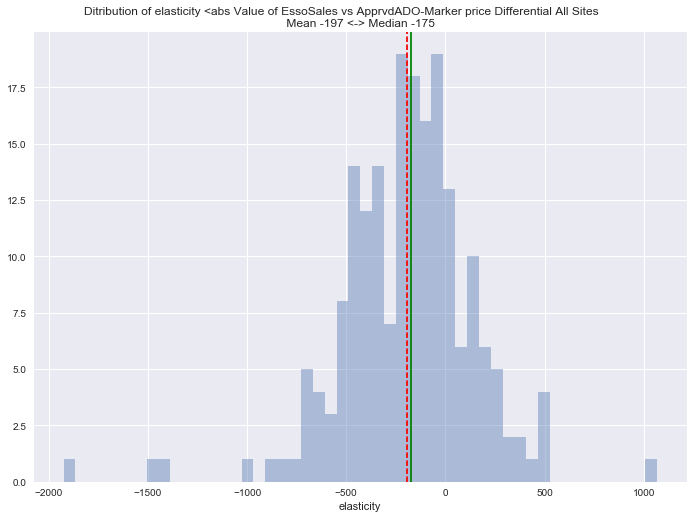

In [60]:
sns.distplot(regEssoSalesVsAppPriceADO.slope,kde=False,bins=50)
mean_slope = regEssoSalesVsAppPriceADO['slope'].mean()
median_slope = regEssoSalesVsAppPriceADO['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value of EssoSales vs ApprvdADO-Marker price Differential All Sites \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

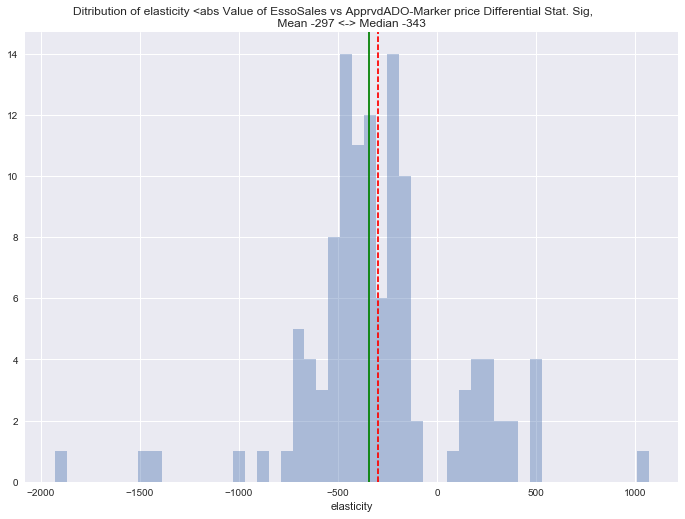

In [61]:
sns.distplot(regEssoSalesVsAppPriceADO_sig.slope,kde=False,bins=50)
mean_slope = regEssoSalesVsAppPriceADO_sig['slope'].mean()
median_slope = regEssoSalesVsAppPriceADO_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value of EssoSales vs ApprvdADO-Marker price Differential Stat. Sig, \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


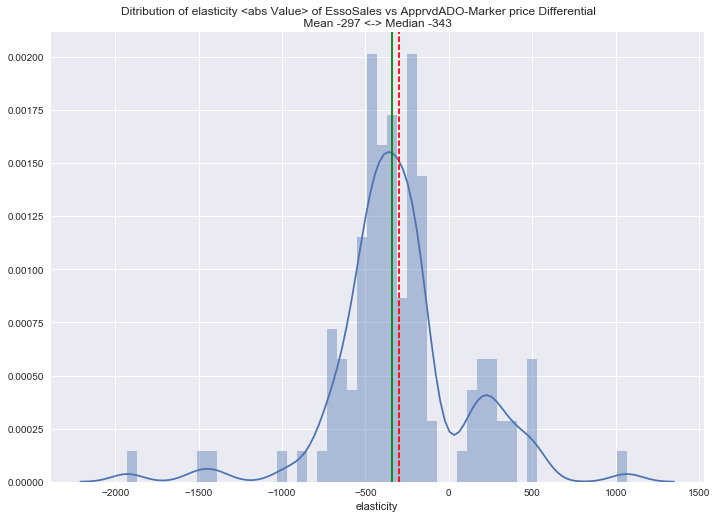

In [41]:
sns.distplot(regEssoSalesVsAppPriceADO_sig.slope,kde=False,bins=50)
mean_slope = regEssoSalesVsAppPriceADO_sig['slope'].mean()
median_slope = regEssoSalesVsAppPriceADO_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value> of EssoSales vs ApprvdADO-Marker price Differential \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

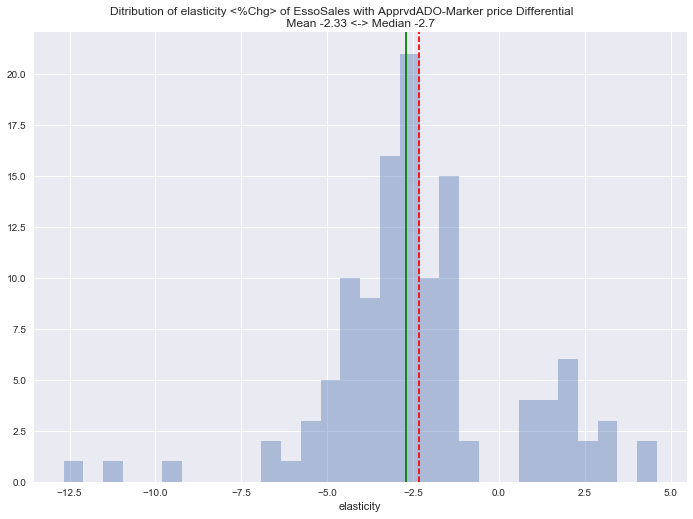

In [47]:
sns.distplot(regEssoSalesVsAppPriceADO_pct_sig.slope,kde=False,bins=30)
mean_slope = regEssoSalesVsAppPriceADO_pct_sig['slope'].mean()
median_slope = regEssoSalesVsAppPriceADO_pct_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <%Chg> of EssoSales with ApprvdADO-Marker price Differential \
          \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

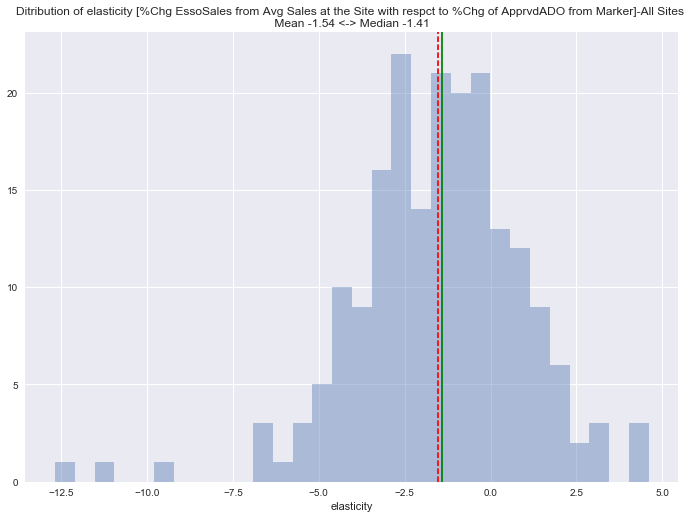

In [58]:
sns.distplot(regEssoSalesVsAppPriceADO_pct.slope,kde=False,bins=30)
mean_slope = regEssoSalesVsAppPriceADO_pct['slope'].mean()
median_slope = regEssoSalesVsAppPriceADO_pct['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity [%Chg EssoSales from Avg Sales at\
 the Site with respct to %Chg of ApprvdADO from Marker]-All Sites \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

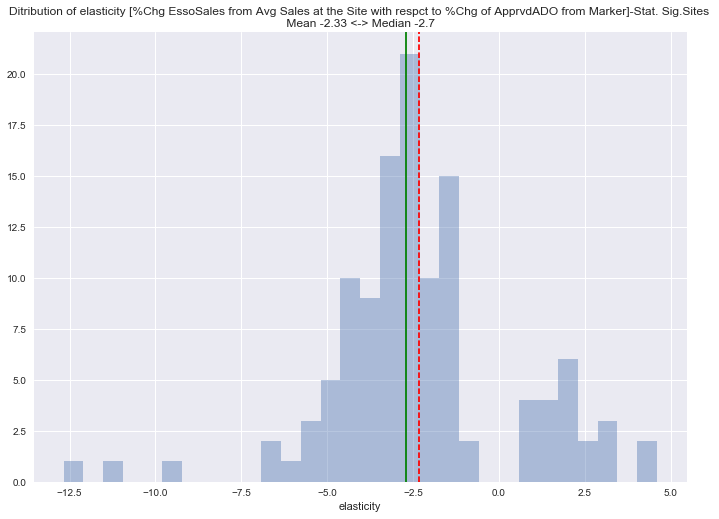

In [59]:
sns.distplot(regEssoSalesVsAppPriceADO_pct_sig.slope,kde=False,bins=30)
mean_slope = regEssoSalesVsAppPriceADO_pct_sig['slope'].mean()
median_slope = regEssoSalesVsAppPriceADO_pct_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity [%Chg EssoSales from Avg Sales at\
 the Site with respct to %Chg of ApprvdADO from Marker]-Stat. Sig.Sites \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

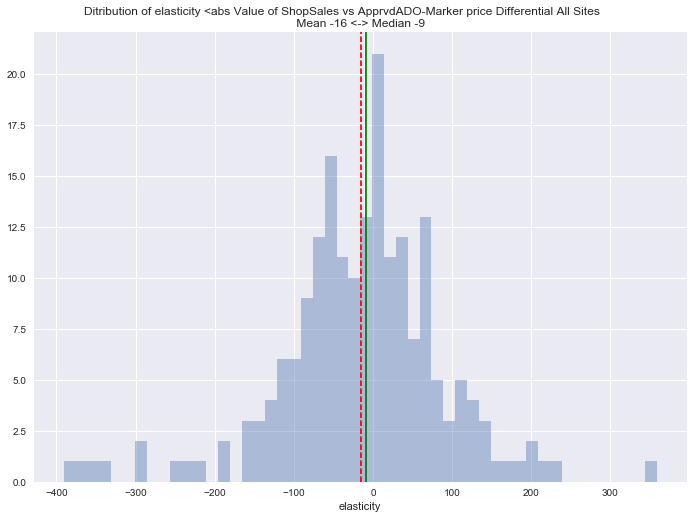

In [62]:
sns.distplot(regShopSalesVsAppPriceADO.slope,kde=False,bins=50)
mean_slope = regShopSalesVsAppPriceADO['slope'].mean()
median_slope = regShopSalesVsAppPriceADO['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value of ShopSales vs ApprvdADO-Marker price Differential All Sites \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

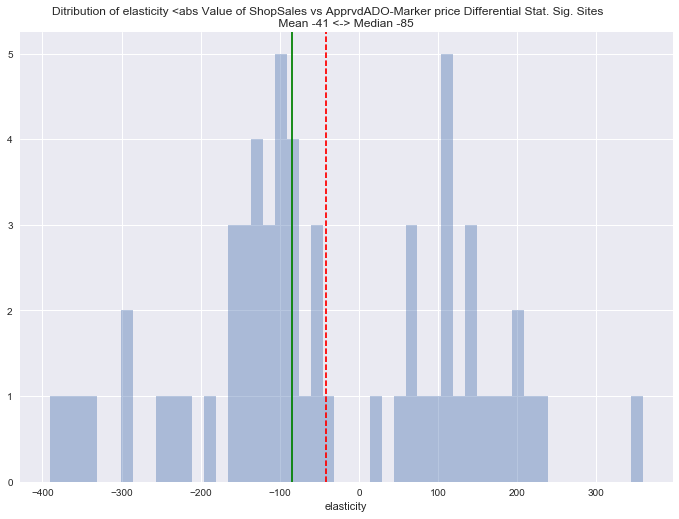

In [63]:
sns.distplot(regShopSalesVsAppPriceADO_sig.slope,kde=False,bins=50)
mean_slope = regShopSalesVsAppPriceADO_sig['slope'].mean()
median_slope = regShopSalesVsAppPriceADO_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value of ShopSales vs ApprvdADO-Marker price Differential Stat. Sig. Sites \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

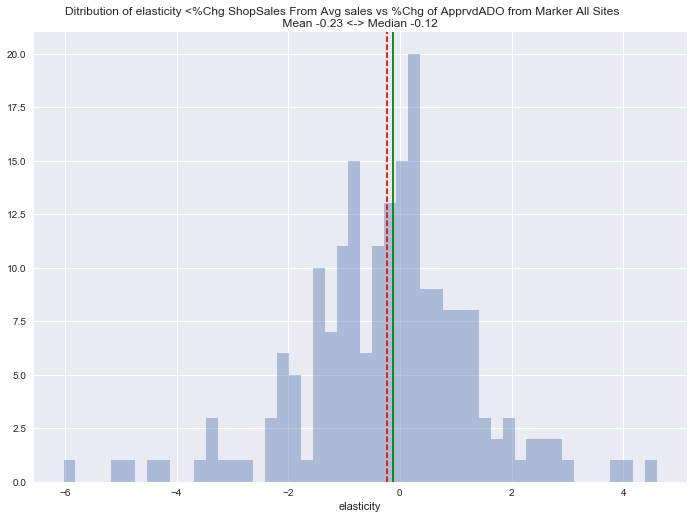

In [66]:
sns.distplot(regShopSalesVsAppPriceADO_pct.slope,kde=False,bins=50)
mean_slope = regShopSalesVsAppPriceADO_pct['slope'].mean()
median_slope = regShopSalesVsAppPriceADO_pct['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <%Chg ShopSales From Avg sales vs %Chg of ApprvdADO from Marker All Sites \
          \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

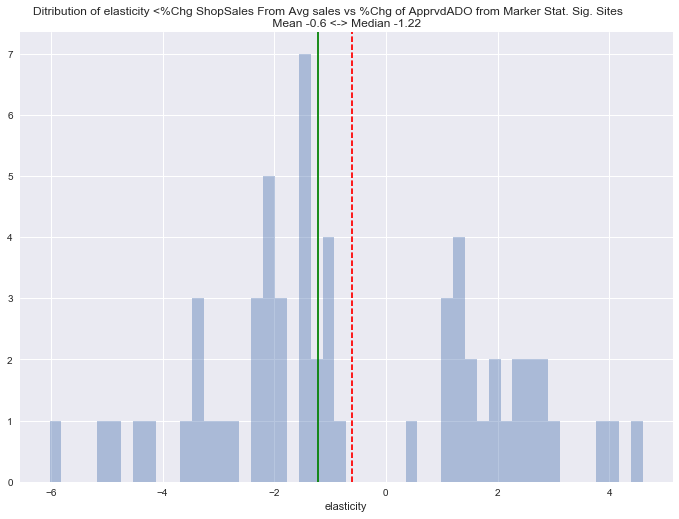

In [67]:
sns.distplot(regShopSalesVsAppPriceADO_pct_sig.slope,kde=False,bins=50)
mean_slope = regShopSalesVsAppPriceADO_pct_sig['slope'].mean()
median_slope = regShopSalesVsAppPriceADO_pct_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <%Chg ShopSales From Avg sales vs %Chg of ApprvdADO from Marker Stat. Sig. Sites \
          \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})